# Cause of death of Soccer Players

As we watch soccer players exhibit their skills on the pitch at the world cup stage, we would think these players are healthy in all sense given the amount of work they put in before and during each game. Health experts advise, exercising is paramount for avoiding many diseases. In that context, I wondered what is the impact of exercise on sports men and women, and in particular, soccer players.

These questions cannot be answered for players currently playing in the game because I do not have access to their medical records so I decided to use a public data on Wikipedia which show the causes of death of soccer players on earth.

I decided to make this more of tutorial so I will share steps of data acquisition through to the analysis. I wanted to find out the average age at death, and the cause of death of soccer players that have passed away.


# Load the required python packages

In [0]:
%reload_ext signature 
# To sign my name at the end of code .You need to have a script saved before it works. You can remove it.
%matplotlib inline
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import io


chartinfo = 'Author: Albert Opoku• Data source: wikidata.org'
infosize = 12

# Querying data from Wikipedia using SPARQL language

SPARQL developed by W3C is an RDF query language, that is, a semantic query language for databases, able to retrieve and manipulate data stored in Resource Description Framework (RDF) format. I decided to write my SPARQL code in python because python with pandas gives me the ability do my analysis without changing to another programing language.

I will query the following information: Name, Country of citizenship, Cause of death, date of birth and date of death for each soccer player reported dead on Wikipedia. 

I would like to acknowledge Ramiro Gómez for his SPARQL python code on GitHub.


In [0]:
query = '''PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT ?name ?cause ?dob ?dod ?country WHERE {
    ?pid wdt:P106 wd:Q937857 . 
    ?pid wdt:P509 ?cid .
    ?pid wdt:P569 ?dob .
    ?pid wdt:P570 ?dod .
    ?pid wdt:P27 ?cot.

    OPTIONAL {
        ?pid rdfs:label ?name filter (lang(?name) = "en") .
    }
    OPTIONAL {
        ?cid rdfs:label ?cause filter (lang(?cause) = "en") .
    }
        OPTIONAL {
        ?cot rdfs:label ?country filter (lang(?country) = "en") .
    }
}'''

url = 'https://query.wikidata.org/bigdata/namespace/wdq/sparql'
data = requests.get(url, params={'query': query, 'format': 'json'}).json()
#data

We will use the code below to parse the values we need out and save in a pandas dataframe for analysis. There are 1,390 soccer players reported dead on Wikipedia. A sneak peak of the data is shown below using the head method in pandas.

In [10]:
soccer = []
for item in data['results']['bindings']:
    try:
        soccer.append({
        'name': item['name']['value'],
        'country': item['country']['value'],
        'cause_of_death': item['cause']['value'],
        'date_of_birth': item['dob']['value'],
        'date_of_death': item['dod']['value']})
    except KeyError:
        pass
df = pd.DataFrame(soccer)
print(len(df))
df.head()

1390


,cause_of_death,country,date_of_birth,date_of_death,name
0,cardiovascular disease,Portugal,1942-01-25T00:00:00Z,2014-01-05T00:00:00Z,Eusébio
1,cardiovascular disease,Portugal,1979-10-25T00:00:00Z,2015-05-26T00:00:00Z,João Lucas
2,embolism,Portugal,1927-02-22T00:00:00Z,2005-04-16T00:00:00Z,Francisco Calado
3,heart failure,Portugal,1938-09-08T00:00:00Z,2010-09-03T00:00:00Z,José Augusto Torres
4,stroke,Portugal,1950-04-18T00:00:00Z,2016-07-25T00:00:00Z,Artur Correia


Let us use df.info() to check the data types and also find out if there are missing values in any of the columns. We will also use the df.describe() to get the summary statistics on the data.
Turns out the fields are all object type and there are no missing values.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 5 columns):
cause_of_death    1390 non-null object
country           1390 non-null object
date_of_birth     1390 non-null object
date_of_death     1390 non-null object
name              1390 non-null object
dtypes: object(5)
memory usage: 54.4+ KB


In [12]:
df.describe()

,cause_of_death,country,date_of_birth,date_of_death,name
count,1390,1390,1390,1390,1390
unique,104,134,1225,1181,1257
top,myocardial infarction,United Kingdom,1954-01-01T00:00:00Z,2016-11-28T00:00:00Z,Ernest Aljančič
freq,330,260,5,21,4


Let us extract the year out of the date of birth and date of death fields so that we can calculate the age of each player.

In [13]:
df['date_of_death'] = df.date_of_death.str.slice(0, 4).astype(int)
df['date_of_birth'] = df.date_of_birth.str.slice(0, 4).astype(int)
df.head()


,cause_of_death,country,date_of_birth,date_of_death,name
0,cardiovascular disease,Portugal,1942,2014,Eusébio
1,cardiovascular disease,Portugal,1979,2015,João Lucas
2,embolism,Portugal,1927,2005,Francisco Calado
3,heart failure,Portugal,1938,2010,José Augusto Torres
4,stroke,Portugal,1950,2016,Artur Correia


In [0]:
df['age']=df.date_of_death - df.date_of_birth

In [15]:
df.head()

,cause_of_death,country,date_of_birth,date_of_death,name,age
0,cardiovascular disease,Portugal,1942,2014,Eusébio,72
1,cardiovascular disease,Portugal,1979,2015,João Lucas,36
2,embolism,Portugal,1927,2005,Francisco Calado,78
3,heart failure,Portugal,1938,2010,José Augusto Torres,72
4,stroke,Portugal,1950,2016,Artur Correia,66


In [16]:
df.describe()

,date_of_birth,date_of_death,age
count,1390.000000,1390.000000,1390.000000
mean,1940.804317,1995.957554,55.153237
std,50.348539,50.011017,19.723217
min,390.000000,426.000000,-63.000000
25%,1927.000000,1994.000000,38.000000
50%,1944.000000,2008.000000,57.000000
75%,1961.000000,2014.000000,71.000000
max,2000.000000,2018.000000,101.000000


It does look like Jackie Benyon was born in the  year 2000 but died in 1937. How could that be? 
That is what you deal with when you work with raw data. We will exclude Jackie Benyon from the data soon. Data on Xie Hui also doesn't seem to be correct.

In [17]:
df[(df['date_of_death']==426)|(df['age']==-63)]

,cause_of_death,country,date_of_birth,date_of_death,name,age
185,peritonitis,United Kingdom,2000,1937,Jackie Benyon,-63
1257,decapitation,China,390,426,Xie Hui,36


In [0]:
df=df[df['age']!=-63]
df=df[df['date_of_death']!=426]

After excluding these two players, the average age at death for soccer players is 55.

In [19]:
df.describe()

,date_of_birth,date_of_death,age
count,1388.000000,1388.000000,1388.000000
mean,1941.878963,1997.131124,55.252161
std,28.301850,26.903070,19.473750
min,1848.000000,1880.000000,12.000000
25%,1927.000000,1994.000000,38.000000
50%,1944.000000,2008.000000,57.000000
75%,1961.000000,2014.000000,71.000000
max,1997.000000,2018.000000,101.000000


Now let us visualize the causes of death for the players. I will visualize the top 20 causes. It is worth to note that Wikipedia sometimes publish multiple cause of death for an individual. It could be that doctors attribute multiple diseases as the cause of death for some patients.

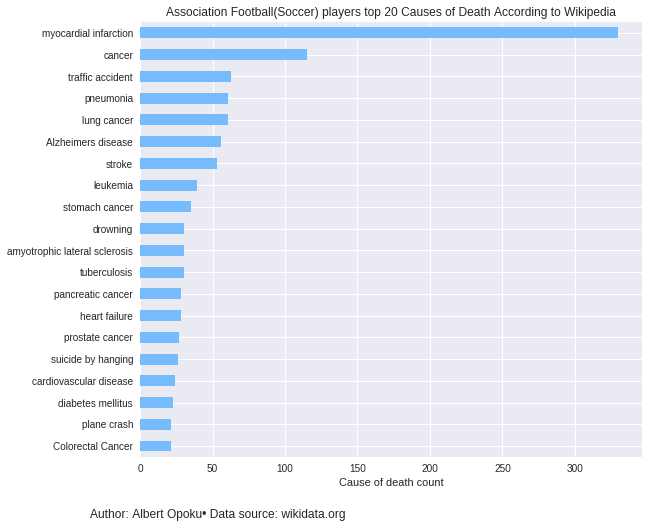

In [20]:
title = 'Association Football(Soccer) players top 20 Causes of Death According to Wikipedia'
footer =  chartinfo
    
df['cause of death'] = df['cause_of_death'].apply(lambda x: x.capitalize())
s = df.groupby('cause_of_death').agg('count')['name'].sort_values().tail(20)

ax = s.plot(kind='barh', figsize=(9, 8), title=title,color='xkcd:sky blue')
ax.yaxis.set_label_text('')
ax.xaxis.set_label_text('Cause of death count')

ax.annotate(footer, xy=(-0.1, -0.14), xycoords='axes fraction', fontsize=infosize)
plt.savefig('img',dpi=300, bbox_inches = "tight")

The result is not as expected. You would think people that workout that much won't develop myocardial infarction aka "heart attacks". Perhaps they stop exercising when they retired from active football or food choices may be blamed. The doctors can help us out. Traffic accident at position number three is interesting considering they can afford to buy good cars. I can't think about any reason behind this, there surely maybe something going on with these players that is not captured in this data. 
Have fun, explore the rest of the graph. You can also try your hands on the code. I have saved it on my GitHub page here

In [44]:
%signature